In [1]:
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
from scipy import ndimage
from random import random, uniform , seed
#import rebound
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from collections import OrderedDict
import time

/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
df = pd.read_csv("../csvs/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
print df.columns.values
features = []
features += ['avg_beta12', 'std_beta12', 'min_beta12', 'max_beta12']
features += ['avg_beta23', 'std_beta23', 'min_beta23', 'max_beta23']
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
print len(features)

['runstring' 't_final_short' 'Rel_Eerr_short' 'avg_beta12' 'std_beta12'
 'min_beta12' 'max_beta12' 'avg_beta23' 'std_beta23' 'min_beta23'
 'max_beta23' 'avg_a1' 'std_a1' 'max_a1' 'min_a1' 'norm_std_a1'
 'norm_max_a1' 'norm_std_window10_a1' 'norm_max_window10_a1' 'avg_e1'
 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1' 'norm_max_e1'
 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1' 'std_inc1'
 'max_inc1' 'min_inc1' 'norm_std_inc1' 'norm_max_inc1'
 'norm_std_window10_inc1' 'norm_max_window10_inc1' 'avg_eH1' 'std_eH1'
 'max_eH1' 'min_eH1' 'avg_iH1' 'std_iH1' 'max_iH1' 'min_iH1' 'avg_ecross1'
 'std_ecross1' 'max_ecross1' 'min_ecross1' 'norm_a1_slope' 'avg_a2'
 'std_a2' 'max_a2' 'min_a2' 'norm_std_a2' 'norm_max_a2'
 'norm_std_window10_a2' 'norm_max_window10_a2' 'avg_e2' 'std_e2' 'max_e2'
 'min_e2' 'norm_std_e2' 'norm_max_e2' 'norm_std_window10_e2'
 'norm_max_window10_e2' 'avg_inc2' 'std_inc2' 'max_inc2' 'min_inc2'
 'norm_std_inc2' 'norm_max_inc2' 'norm_std_window10_inc2'
 'norm_max_window

In [18]:
X = df[features]
Y = df["Stable"]

trainX, testX, trainY, testY = train_test_split(X, Y, random_state = 0, test_size = 0.6)

In [64]:
param1 = "avg_ecross2"
param2 = "avg_ecross3"

int_size = 20
print  np.min(df[param1]), np.max(df[param1]) , np.min(df[param2]), np.max(df[param2])
val1 = np.linspace(np.min(df[param1]), np.max(df[param1]), int_size)
val2 = np.linspace(np.min(df[param2]), np.max(df[param2]), int_size)
X.iloc[11000:11005, :]

0.0015525846466 85.3046170811 0.0012512570306 30.1339872732


,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23,avg_iH1,avg_iH2,...,std_ecross2,max_ecross2,min_ecross2,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a1_slope,norm_a2_slope,norm_a3_slope
11000,2.226405,1.590427,-1.425888,5.382064,7.116848,0.831238,6.093583,9.424820,12.918515,6.586618,...,0.231260,9.127416,0.177621,0.783406,0.014893,0.708635,0.332568,1.727405e-08,1.335806e-08,-5.499480e-09
11001,6.571784,1.390159,4.032006,8.938953,24.019576,0.313744,23.486594,24.598436,1.103194,0.310044,...,0.103584,0.863551,0.026989,0.019690,0.000134,0.000132,0.000019,-8.631184e-09,8.338639e-09,1.922596e-12
11002,20.734483,0.003443,20.725052,20.745188,8.522262,0.016498,8.464447,8.548464,1.137960,0.793826,...,0.048369,0.065181,0.012378,0.158535,0.057838,0.161686,0.069039,1.246863e-14,-3.221063e-12,1.509653e-11
11004,82.326638,34.494461,2.383498,114.796396,-25.465466,11.644055,-33.345200,5.795006,0.404757,1.111951,...,0.386909,17.549762,0.409412,0.037548,0.015991,0.422624,0.032714,-1.488619e-09,5.349984e-07,-1.092438e-08
11005,-20.128498,9.626219,-29.238861,2.744503,28.797683,2.925573,21.365899,32.618227,10.376861,8.338942,...,1.201957,2.723097,0.081829,0.294220,0.030600,0.442976,0.044603,2.753801e-07,-6.045572e-08,-4.156846e-09


In [65]:
print df[df[param1]<0].shape # 1524 / 25000 that has beta less than 1
negative = df[df[param1]<0]
print np.average(negative["instability_time"]) , np.median(negative["instability_time"])            
           
df[df[param1] ==df[param1].min()]

(0, 126)
nan nan


/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
14542,0014542.bin,10000.0,2.711205e-08,27.383337,0.002189,27.376461,27.386086,23.042487,0.062041,22.936388,...,2.948872,0.129519,0.001007,0.1279,0.009694,-2.596929e-09,0.376941,1.0,1.000000e+09,9.206451e-09


In [66]:
print X.shape
iterations = [0]*(int_size**2)
for i in range (0,int_size):
      for j in range(0,int_size):
            iterations[(i*int_size)+j] = (val1[i], val2[j])
#print iterations

(24999, 37)


In [67]:
# new data set with the varying parameters of interest
new_data = np.zeros((testX.shape[0], testX.shape[1],int_size**2)) 
print new_data.shape


(15000, 37, 400)


In [68]:
#change all the values in the data to the one you are interested in
start = time.time()
for i, val in enumerate(iterations):
    testX[param1] = val[0]
    testX[param2] = val[1]
    new_data[:,:,i]= testX.values
end  = time.time()
print end - start

/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


56.2865800858


In [52]:
# ensure that you altered the values properly 
print new_data[:2,:,3] # only the first and second of each entry should be the same

[[ -2.66336717e+04   2.28780662e+04   1.65485517e+01   1.76682540e+01
   -4.08813039e+04   2.17808815e+05   2.02196389e+00   4.80033713e+00
    1.10272480e+00   4.82059485e+00   7.88956486e-05   1.75918016e-04
    4.55412757e-05   8.26079918e-05   1.85698683e-03   6.35012994e-03
    9.64474200e-04   1.32860449e-03   2.90423698e-03   9.74457148e-03
    1.53958627e-03   2.15621730e-03   6.62601380e-02   2.94811823e-02
    3.45006235e-02   1.12608885e-02   1.02296432e+00   4.05353642e-01
    4.15965057e-01   1.30344311e-02   1.68653478e+00   3.66891959e-01
    7.36534564e-01   1.34030397e-02   2.54127209e-10   1.16820832e-09
   -2.31717153e-09]
 [ -2.66336717e+04   2.28780662e+04   7.39209340e+00   6.52280664e+01
   -4.08813039e+04   2.17808815e+05  -2.55403815e+01   9.93665760e+00
    5.30199637e-01   3.10711342e+00   2.01474038e-03   2.65847518e-03
    6.81025501e-05   1.20114728e-04   1.95904469e-01   4.00323953e-01
    9.39388461e-04   1.75130735e-03   1.67740038e-02   3.04042904e-02


In [56]:
varying_pred = np.zeros((new_data.shape[0], new_data.shape[2]))
print varying_pred.shape
varyin_pred_mean = np.zeros(400)
model = xgb.XGBClassifier(n_estimators=200, subsample= 0.938, colsample_bytree= 0.745, max_depth=7, seed =  0, learning_rate=0.085)
xgb_params = model.get_xgb_params()
model.fit(trainX.as_matrix(), trainY.as_matrix())
#dtrain = xgb.DMatrix(trainX , trainY)
#bst = xgb.train(xgb_params, dtrain)

print new_data.shape, varying_pred.shape

(15000, 400)
(15000, 37, 400) (15000, 400)


In [57]:
start = time.time()
print type(new_data[:,:,i]), new_data.shape
for i in range (len(iterations)):
    #print varying_pred[:,:,i].shape, new_data[:,:,i].shape
    #dtest = xgb.DMatrix(new_data[:,:,i])

    #varying_pred[:,i] = bst.predict(dtest)
    varying_pred[:,i] =model.predict_proba(new_data[:,:,i])[:,1] # i = 400
    varyin_pred_mean[i] = np.mean(varying_pred[:,i])
end = time.time()
print end - start

<type 'numpy.ndarray'> (15000, 37, 400)
52.344440937


In [26]:
## ALREADY DONE IN THE CELL ABOVE< THIS WAS JUST TO TRY TO MULTI THREAD THE ABOVE PREDICTIOS 
## IF YOU ARE DOING LOTS OF THEM FOR A MORE REFINED GRID
'''
start = time.time()
thread_count = 5
chunks = int(varying_pred.shape[0]//thread_count)
print thread_count
#sections = np.linspace(0,varying_pred.shape[0]-1 , 11, dtype='int')
sections = [[i*chunks, (i+1)*chunks] for i in range(5)]
sections[-1][1] = varying_pred.shape[0]
print sections

import thread
from multiprocessing import Pool
# do above cell in parallel
#sections = np.linspace(0,varying_pred.shape[0], 11).dtype(int)

def thread_pred(params):
    varying = varying_pred[params[0]: param[1], i] # sectino o total preds
    for i in range (varying.shape[0]):
        varying_pred[:,i]=model.predict_proba(new_data[:,:,i])[:,1] # i = 400
        varyin_pred_mean[i] = np.mean(varying_pred[:,i])


        
#Initialize the threads
try:
    p = Pool(10)
    p.map(thread_pred, varying_pred[sections])
except Exception as e:
    print e
end = time.time()
print "Making parallel preds",  end - start
'''

'\nstart = time.time()\nthread_count = 5\nchunks = int(varying_pred.shape[0]//thread_count)\nprint thread_count\n#sections = np.linspace(0,varying_pred.shape[0]-1 , 11, dtype=\'int\')\nsections = [[i*chunks, (i+1)*chunks] for i in range(5)]\nsections[-1][1] = varying_pred.shape[0]\nprint sections\n\nimport thread\nfrom multiprocessing import Pool\n# do above cell in parallel\n#sections = np.linspace(0,varying_pred.shape[0], 11).dtype(int)\n\ndef thread_pred(params):\n    varying = varying_pred[params[0]: param[1], i] # sectino o total preds\n    for i in range (varying.shape[0]):\n        varying_pred[:,i]=model.predict_proba(new_data[:,:,i])[:,1] # i = 400\n        varyin_pred_mean[i] = np.mean(varying_pred[:,i])\n\n\n        \n#Initialize the threads\ntry:\n    p = Pool(10)\n    p.map(thread_pred, varying_pred[sections])\nexcept Exception as e:\n    print e\nend = time.time()\nprint "Making parallel preds",  end - start\n'

In [58]:
x_list = [x[0] for x in iterations]
y_list = [x[1] for x in iterations]

Partial Dependency on avg_beta12 and avg_beta23 for Orbital Stability


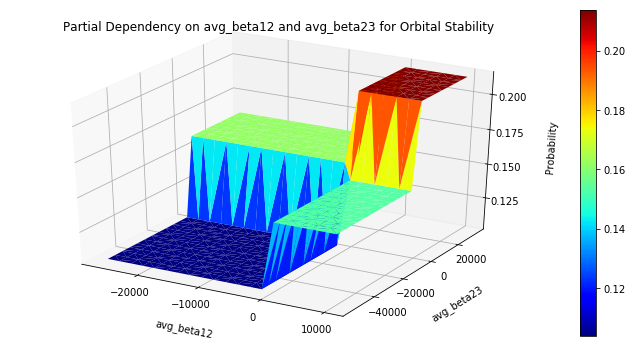

In [59]:
from matplotlib import rc, cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator

#rc('text',usetex=False)
#rc('font',family='serif')
#rc('font',serif='cm')
#rc('font',size=15,weight='black',stretch='extra-expanded',style='oblique')
#rc('axes',linewidth=2)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(x_list, y_list, varyin_pred_mean, cmap=cm.jet, linewidth=0)
#ax.scatter()
fig.colorbar(surf)
ax.tick_params(axis='both', which='major', pad=3)
#ax.rcParams['ytick.major.pad']='8'

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
ax.set_xlabel(param1, labelpad=15)
ax.set_ylabel(param2, labelpad=15)
ax.set_zlabel('Probability', labelpad=15)
title_string ='Partial Dependency on {0} and {1} for Orbital Stability'.format(param1, param2) 
print title_string
ax.set_title(title_string)
#ax.plot_surface(x_list, y_list, varyin_pred_mean)
#ax.ad
plt.show()

In [63]:
print np.unique(varyin_pred_mean)

[ 0.10369901  0.15338612  0.16197912  0.21364615]


In [16]:
#use bokeh to plot seomthing you can move and drag around
from bokeh.layouts import row, widgetbox
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import push_notebook, output_notebook
#from surface3d import Surface3d
output_notebook()

RuntimeError: node.js is needed to allow compilation of custom models ("conda install -c bokeh nodejs" or follow https://nodejs.org/en/download/)

In [2]:
from bokeh.core.properties import Any, Dict, Instance, String
from bokeh.models import ColumnDataSource, LayoutDOM
DEFAULTS = {
    'width':          '600px',
    'height':         '600px',
    'style':          'surface',
    'showPerspective': True,
    'showGrid':        True,
    'keepAspectRatio': True,
    'verticalRatio':   1.0,
    'legendLabel':     'stuff',
    'cameraPosition':  {
        'horizontal': -0.35,
        'vertical':    0.22,
        'distance':    1.8,
    }
}
class Surface3d(LayoutDOM):
    __implementation__ = "surface3d.coffee"
    data_source = Instance(ColumnDataSource)
    x = String
    y = String
    z = String
    color = String
    options = Dict(String, Any, default=DEFAULTS)


In [41]:
source = ColumnDataSource(data=dict(x = x_list, y = y_list, z = varyin_pred_mean, color = varyin_pred_mean))

In [45]:
#from surface3d import Surface3d
surface = Surface3d(x="x", y="y", z="z", color="color", data_source=source)

In [46]:
layout = row(surface)
show(layout, notebook_handle=True)